---
layout: post
title: "Posting with jupyter notebook"
description: "jupyter로 블로깅하기"
date: 2017-12-29
tags: jupyter,python
comments: true
mathjax: true
---

### jupyter notebook Posting Test

오늘은 jupyter notebook으로 생성된 파일인 `ipynb`로 github blog에 포스팅하는 것을 정리해볼까한다.

jupyter notebook파일을 바로 올리는 것으로 코드와 실행결과를 정리하기가 더욱 편해지지 않을까 싶다!




##### 1. 예제파일

우선 지금 글을 쓰고 있는 이 파일도 jupyter notebook파일로 실험하고 있다ㅎㅎ
간단한 파이썬 예제코드를 하나 작성해보자.


- 코드 예제

In [1]:
# 필요 패키지 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
y = np.random.randint(1,3,10)
x = np.random.randint(1,3,10)
print(y)
print(x)
print(y*x)

[1 1 1 1 1 1 1 2 2 1]
[2 1 2 1 1 1 2 1 2 2]
[2 1 2 1 1 1 2 2 4 2]


위와 같이 간단한 코드들과 결과들은 특별한 설정을 해줄 필요도 없이 바로 표시가 된다!

하지만 아래와 같이 결과를 이미지로 출력한 것들은 특별한 설정을 해주어야한다.

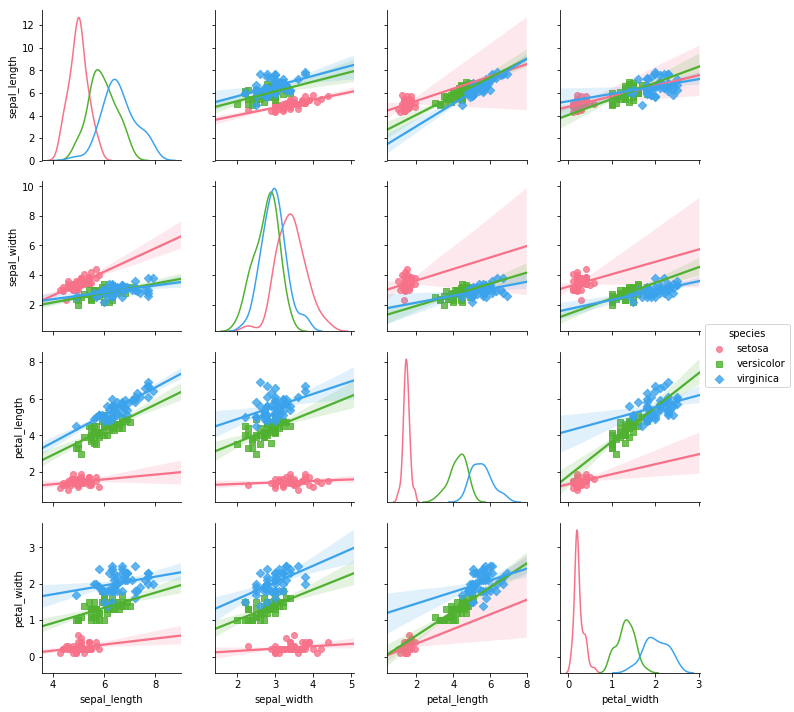

In [3]:
iris = sns.load_dataset("iris")
sns.pairplot(iris, hue="species", markers=["o", "s", "D"], kind="reg", diag_kind="kde", palette="husl")
plt.show()

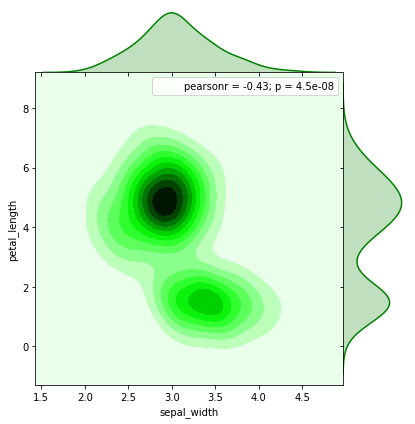

In [4]:
iris = sns.load_dataset("iris")
g = sns.jointplot("sepal_width", "petal_length", data=iris,
                  kind="kde", space=0, color="g")
plt.show()

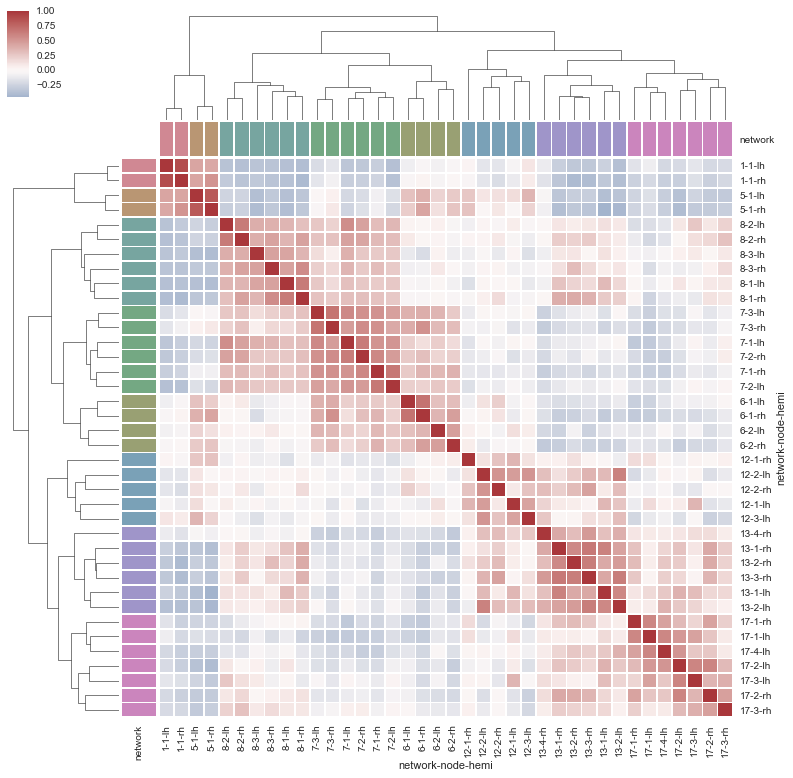

In [5]:
sns.set()

# Load the brain networks example dataset
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Select a subset of the networks
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Create a categorical palette to identify the networks
network_pal = sns.husl_palette(8, s=.45)
network_lut = dict(zip(map(str, used_networks), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df.columns.get_level_values("network")
network_colors = pd.Series(networks, index=df.columns).map(network_lut)

# Draw the full plot
sns.clustermap(df.corr(), center=0, cmap="vlag",
               row_colors=network_colors, col_colors=network_colors,
               linewidths=.75, figsize=(13, 13))
plt.show()

- 수식 예제


- 블록 수식 예제
    
    $$
    \begin{align}
        f\left(x:\theta\right) = & \frac{1}{\sigma\sqrt{2\pi}}\exp\left(-\frac{\left(x-\theta\right)} {2\sigma^2}\right) \\
        M_X\left(t\right) = & \exp\left(\mu t + \frac{\sigma^2t^2}{2}\right) \\
        \phi_X\left(t\right)=& \exp\left(\mu it-\frac{1}{2}\sigma^2t^2\right) \\
        \text{I} = & \begin{pmatrix}
                        \frac{1}{\sigma^2}&0\\
                        0&\frac{1}{2\sigma^4}
                      \end{pmatrix}
    \end{align} 
    $$
    
    
- 인라인수식 예제
$F\left(x\right) = \frac{1}{2}\left(1+erf\left(\frac{x-\mu}{\sigma\sqrt{2}}\right)\right)$


##### 2. 파일 변환
###### 2.1 to markdown

우선 이렇게 만든 `ipynb`를 **markdown**파일로 변환을 시켜야 한다.

```powershell
> jupyter nbconvert --to markdown 변환시킬파일.ipynb
```
을 입력하면 원본파일명.md파일이 생성된다.

1. 이미지 파일의 경우엔 변환시킨 파일이 있는 폴더에 파일명과 같은 이름으로 이미지들이 저장된 폴더가 생성된다.
2. 그 이미지 폴더를 자신의 블로그의 이미지 저장소에 넣은 후, md파일에 수동으로[^1] (...) 이미지 파일을 넣어준다.
3. git에 push한다.





###### 2.2 to html

```powershell

    > jupyter nbconvert --to html 변환시킬파일.ipynb
    > jupyter nbconvert --to html --template basic 변환시킬파일.ipynb
```
두가지 명령어가 존재하는데, 
    - 첫번째는 사실 뒤의 옵션이 `--template full`이 생략된것이다. 즉 full page의 html을 렌더링을 한다.
    - 두번째는 full page가 아닌 최소화된 html을 만든다. 이미 존재하는 다른 html의 속에 넣을 때 사용하면 좋을 듯하다.
    


위와 같이 간단한 설정만으로 ipynb로 포스팅을 즐길수 있다!

~~그리고 원래 지킬에 올릴때 헤더부분에 쓰던 설정을 사용안해도 올라는 가지만 태그 구분이 안되므로 수동으로 넣어주자(.....불편한게 은근 많다!!)~~



~~- 추후에 이미지 설정하는 것이 있나 더 알아보자!~~



[^1] 이거 은근 귀찮다 -_-;뭔가 방법을 찾아야할듯.

